## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [1]:
# !pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, precision_recall_curve, precision_score, f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

from ucimlrepo import fetch_ucirepo 

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing. 
Let's take a brief look to the dataset.

In [3]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
df = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [4]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
8915,50,admin.,divorced,secondary,no,3423,yes,yes,NaN,4,jun,192,6,-1,0,NaN
37464,32,technician,single,secondary,no,271,yes,no,cellular,13,may,80,2,268,2,other
35757,48,services,divorced,secondary,no,62,yes,no,cellular,8,may,561,1,-1,0,NaN
4426,35,technician,single,secondary,no,1861,yes,no,NaN,20,may,297,1,-1,0,NaN
22258,49,technician,divorced,secondary,no,57,no,no,cellular,21,aug,396,3,-1,0,NaN


In [5]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [6]:
# Q1.2

print(f"The highest number of NaN values in a single column is {max(df.isna().sum().values)}.")

The highest number of NaN values in a single column is 36959.


In [7]:
# Q1.3

print(f"The name of the column with the smallest number (>0) of NaN values is \'{df.columns[np.where(df.isna().sum().values > 0)[0][0]]}\'.")

The name of the column with the smallest number (>0) of NaN values is 'job'.


In [8]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
# for numerical columns (if any) fill with column mean value


In [9]:
# As here are NaNs only in categorical type columns, fill them with 'unknown' value and check out whether every NaN is eliminated:

df.loc[:, ["job", "marital", "education", "contact", "poutcome"]] = df[["job", "marital", "education", "contact", "poutcome"]].fillna("unknown")
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

-----
## Q2 
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [10]:
fraction = round(y[y["y"] == "yes"].count().iloc[0] / y["y"].count(), 3)
print(f"The fraction of \'1\' values in the dataset is: {fraction}.")

The fraction of '1' values in the dataset is: 0.117.


-----
## Q3 
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [11]:
new_df = df.copy()
new_df = new_df.merge(y, left_index=True, right_index=True)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
# Q3.2

poutcome_cat = new_df[new_df["y"] == "yes"].groupby("contact").count() / new_df.groupby("contact").count()
print(f"The most successful \'poutcome\' category is: \'{poutcome_cat.idxmax().values[0]}\'.")

The most successful 'poutcome' category is: 'cellular'.


In [13]:
# Q3.4

job_cat = new_df[new_df["y"] == "yes"].groupby("job").count() / new_df.groupby("job").count()
job_cat = job_cat.sort_values(by="y").index[-3:].to_list()
job_cat.sort()
print(f"3 most successful jobs are: {job_cat}.")

3 most successful jobs are: ['retired', 'student', 'unemployed'].


In [14]:
# Q3.6

job_bal = new_df.groupby("job")[["balance"]].median().min().values[0]
print(f"The jobs' smallest median balance is: {job_bal:.3f}.")

The jobs' smallest median balance is: 339.500.


-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [15]:
# TODO map y (target) values to 0 / 1

y.loc[:, "y"] = y["y"].map({"yes": 1, "no": 0})
y = y.astype(int)
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [16]:
# TODO map binary columns' values to 0 / 1

df = df.replace({"default": {"yes": 1, "no": 0}, "housing": {"yes": 1, "no": 0}, "loan": {"yes": 1, "no": 0}})
new_df = new_df.replace({"default": {"yes": 1, "no": 0}, "housing": {"yes": 1, "no": 0}, "loan": {"yes": 1, "no": 0}, "y": {"yes": 1, "no": 0}})
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown


In [17]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [18]:
# Q4.1 Who accepts more deposits (on average): people with housing loans (housing) 
# or people with personal loans (loan)? The answer is the acceptance rate of the chosen (most successful) category.

abs_loan = new_df[new_df["housing"] == 1].groupby("y").count().iloc[:, -1].values[1] / new_df[new_df["housing"] == 1].groupby("y").count().iloc[:, -1].sum()
pres_loan = new_df[new_df["loan"] == 1].groupby("y").count().iloc[:, -1].values[1] / new_df[new_df["loan"] == 1].groupby("y").count().iloc[:, -1].sum()
print(f"The highest acceptance rate is: {round(max(abs_loan, pres_loan), 3)}")

The highest acceptance rate is: 0.077


In [19]:
# Q4.2 What is the min, max, average and std values of age among people who have housing loans (housing)? 
# The answer shold be given in descending order

min_age = round(df[df["housing"] == 1].loc[:, "age"].min(), 3)
max_age = round(df[df["housing"] == 1].loc[:, "age"].max(), 3)
avg_age = round(df[df["housing"] == 1].loc[:, "age"].mean(), 3)
std_age = round(df[df["housing"] == 1].loc[:, "age"].std(), 3)
list_age = [min_age, max_age, avg_age, std_age]
list_age.sort(reverse=True)
print(f"The list of ages: {list_age}.")

The list of ages: [78, 39.175, 20, 8.927].


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

In [20]:
new_df[new_df["y"] == 0]["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45194    59
45198    37
45199    34
45209    57
45210    37
Name: age, Length: 39922, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

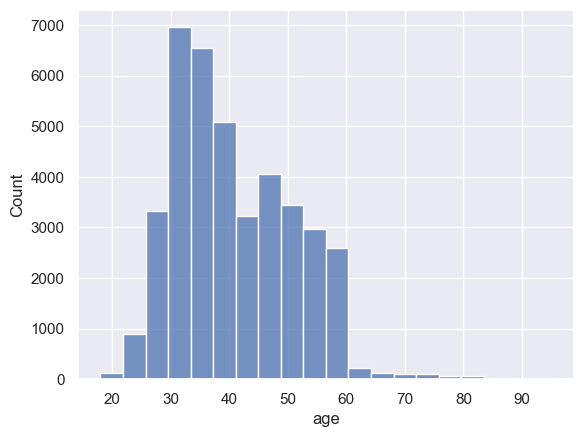

In [21]:
sns.histplot(data=new_df, x=new_df[new_df["y"] == 0]["age"], bins=20)

<Axes: xlabel='age', ylabel='Count'>

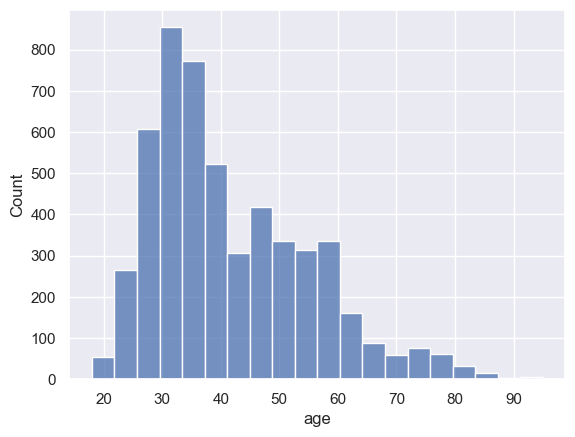

In [22]:
sns.histplot(data=new_df, x=new_df[new_df["y"] == 1]["age"], bins=20)

<Axes: xlabel='age', ylabel='Count'>

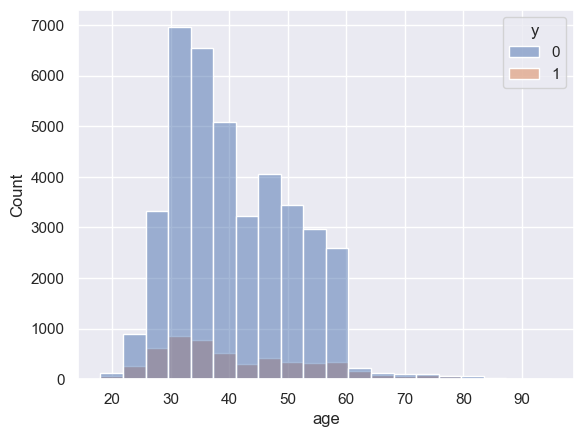

In [23]:
sns.histplot(data=new_df, x="age", hue="y", bins=20)

In [24]:
print("Answer: A")

Answer: A


## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

<Axes: xlabel='duration', ylabel='Count'>

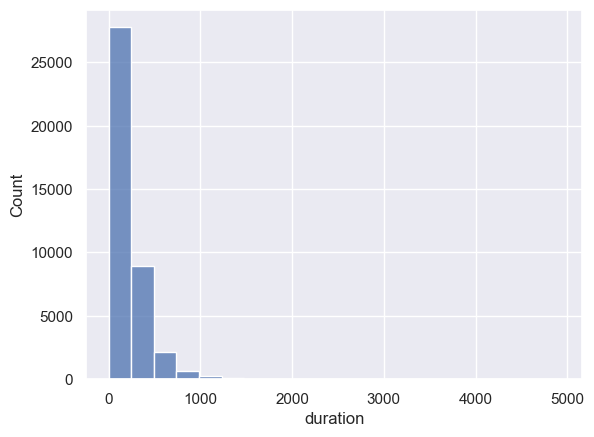

In [25]:
sns.histplot(data=new_df, x=new_df[new_df["y"] == 0]["duration"], bins=20)

<Axes: xlabel='duration', ylabel='Count'>

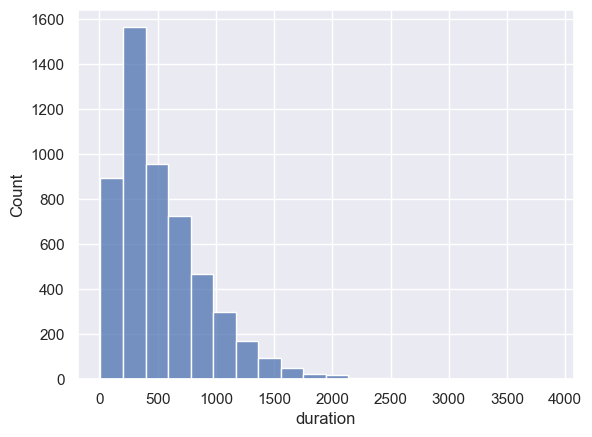

In [26]:
sns.histplot(data=new_df, x=new_df[new_df["y"] == 1]["duration"], bins=20)

<Axes: xlabel='duration', ylabel='Count'>

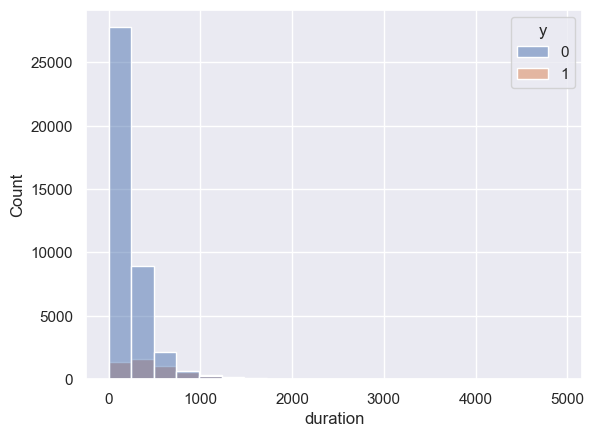

In [27]:
sns.histplot(data=new_df, x="duration", hue="y", bins=20)

In [28]:
print("A")

A


-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [29]:
df.dtypes

age             int64
job            object
marital        object
education      object
default         int64
balance         int64
housing         int64
loan            int64
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [30]:
df["day_of_week"].nunique()

31

In [31]:
# TODO define numerical columns


print("There are 6 numerical columns.")

There are 6 numerical columns.


-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [32]:
# Q8.3

dur_corr = new_df.loc[:, ["duration", "y"]].corr(method="pearson").iloc[0, 1]
print(f"The Pearson correlation between the \'duration\' and the target variables is: {dur_corr:.3f}.")

The Pearson correlation between the 'duration' and the target variables is: 0.395.


In [33]:
# Q8.5

mult_corr = pd.DataFrame(new_df[["age", "balance", "duration", "campaign", "pdays", "previous"]].corrwith(new_df["y"]), columns=["vals"])
max_corr = mult_corr[mult_corr["vals"] == max(mult_corr.iloc[:, 0])].index[0]
print(f"\'{max_corr}\' has the highest Pearson correlation withe the target variable.")

'duration' has the highest Pearson correlation withe the target variable.


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

c:\users\nezhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


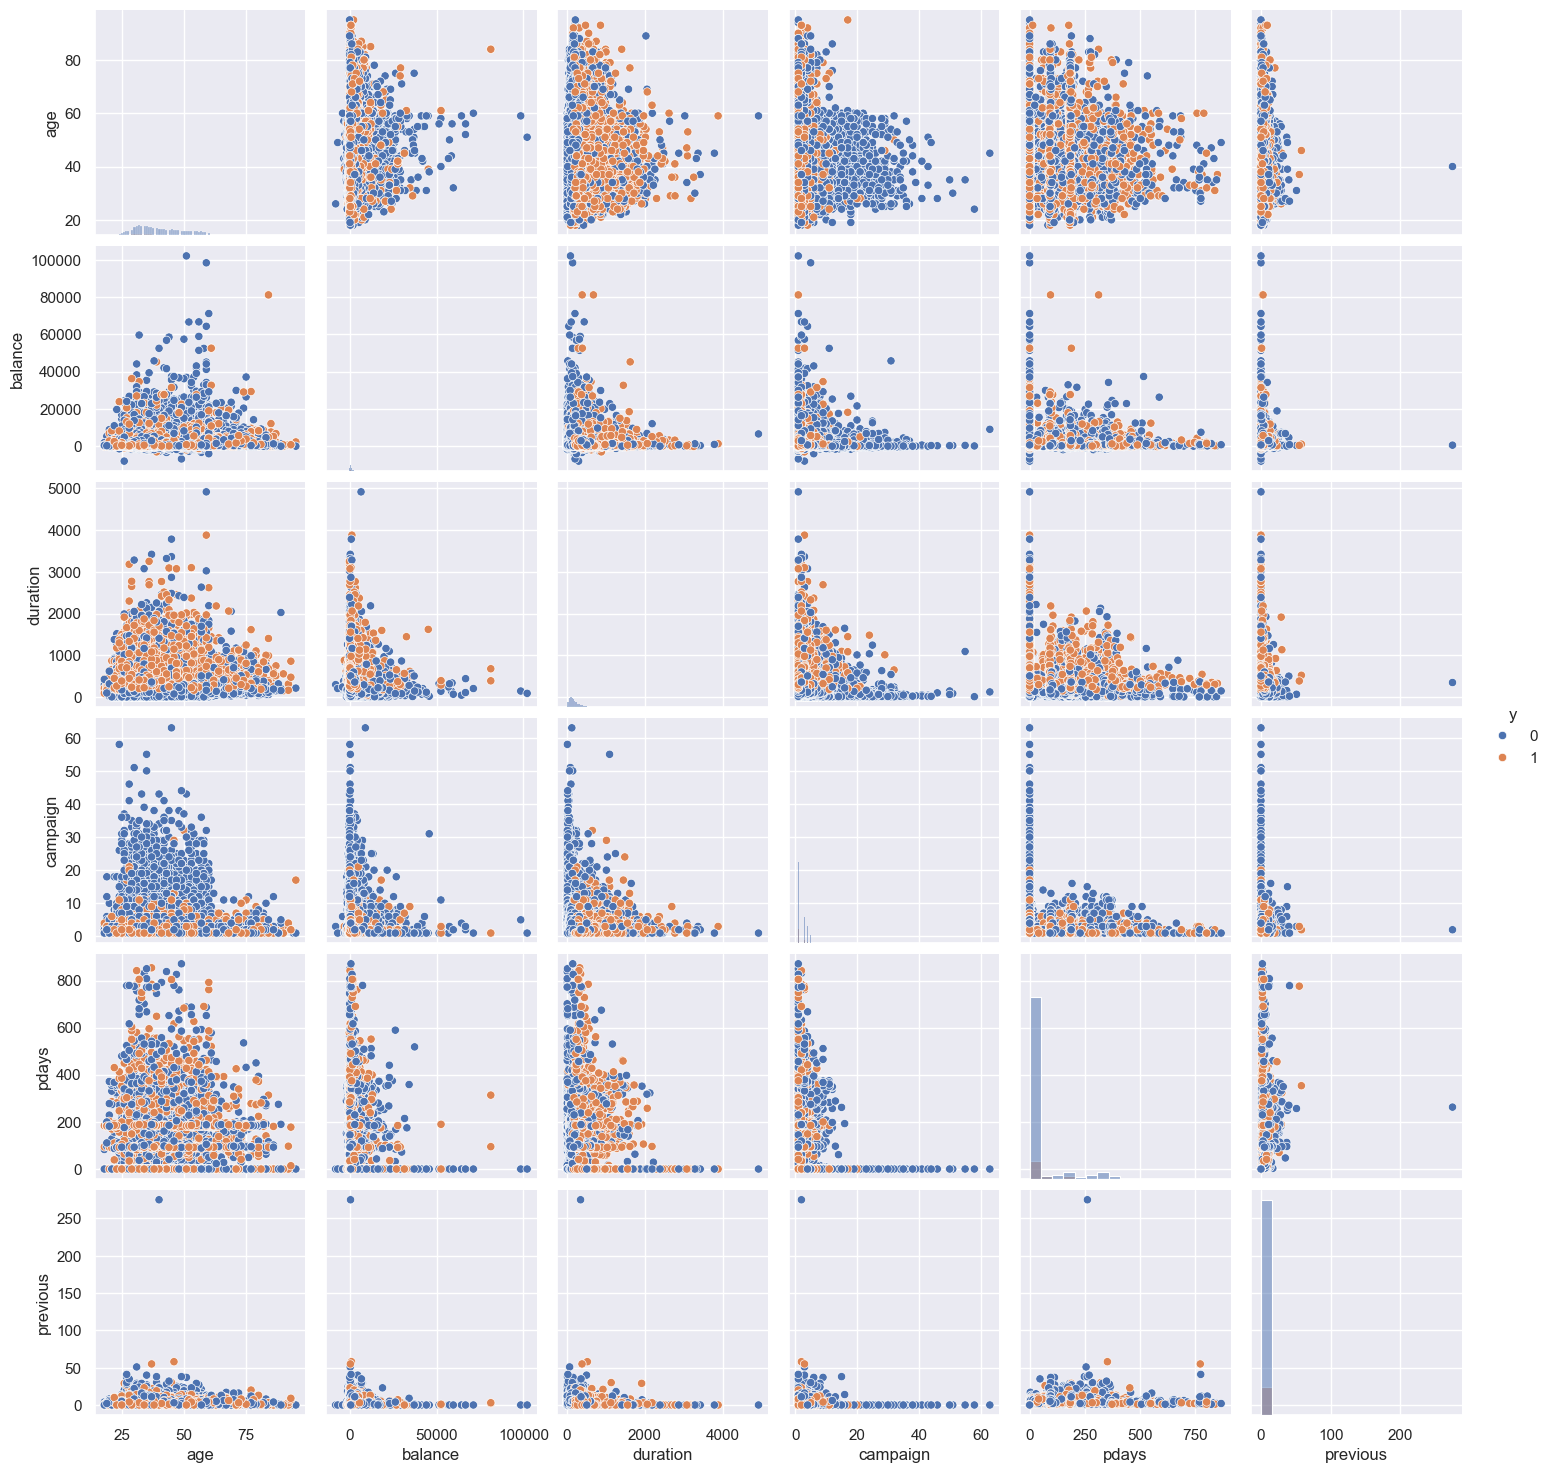

In [34]:
mini_df = new_df[["age", "balance", "duration", "campaign", "pdays", "previous", "y"]].copy()
sns.pairplot(data=mini_df, hue="y", diag_kind="hist")

It seems, that, by and large, dependency of numerical data with success is not obvious in the most cases. However, the ''campaign' and 'duration' features' correlations with others might be useful due to the fact of the distributions of these correlations on the plots. For example, on the correlation of the 'campaign' and 'age' features diagram we can see, that the less the 'campaign' value, the bigger the success chance.

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [35]:
df["cont"] = df["pdays"].apply(lambda x: np.where(x > -1, 1, 0))
contacted_num = df["cont"].value_counts()[0]
print(f"{contacted_num} people were not contacted earlier.")

36954 people were not contacted earlier.


------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [36]:
print(f"There are {df.shape[1]} columns in the DataFrame right now.")

There are 17 columns in the DataFrame right now.


-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame. 

#### How many resulting columns in a DataFrame do you have after this operation?

In [37]:
# TODO add one-hot labels and drop columns


job_df = pd.get_dummies(df["job"], prefix="job").astype(int)
job_df = job_df.rename(columns={"job_admin.": "job_admin"})
marital_df = pd.get_dummies(df["marital"], prefix="marital").astype(int)
education_df = pd.get_dummies(df["education"], prefix="education").astype(int)
contact_df = pd.get_dummies(df["contact"], prefix="contact").astype(int)
poutcome_df = pd.get_dummies(df["poutcome"], prefix="poutcome").astype(int)
dum_df = [new_df.iloc[:, :-1], job_df, marital_df, education_df, contact_df, poutcome_df]

df = pd.concat(dum_df, join="inner", axis=1)
df = df.drop(["job", "marital", "education", "contact", "poutcome"], axis=1)
df

,age,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [38]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [39]:
df["month"] = pd.to_datetime(df.month, format='%b').dt.month
df

,age,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [40]:
print(f"The number of resulting columns is: {df.shape[-1]}.")

The number of resulting columns is: 37.


## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], y, test_size=0.2, random_state=42)

In [42]:
suc_y = y_train[y_train["y"] == 1].count().iloc[0]
print(f"There are {suc_y} successful deposit subscriptions in the train set.")

There are 4198 successful deposit subscriptions in the train set.


## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [43]:
scaler = StandardScaler()
#df[["age", "balance", "duration", "campaign", "pdays", "previous"]] = scaler.fit_transform(df.loc[:, ["age", "balance", "duration", "campaign", "pdays", "previous"]])

X_train[["age", "balance", "duration", "campaign", "pdays", "previous"]] = scaler.fit_transform(X_train[["age", "balance", "duration", "campaign", "pdays", "previous"]])
X_test[["age", "balance", "duration", "campaign", "pdays", "previous"]] = scaler.transform(X_test[["age", "balance", "duration", "campaign", "pdays", "previous"]])

print(f"The median value of the \'duration\' field is: {df.duration.median()}.")

The median value of the 'duration' field is: 180.0.


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [44]:
select_k_best_classifier = SelectKBest(score_func=f_classif, k=3)
select_k_best_classifier.fit_transform(X_train, y_train)

mask = select_k_best_classifier.get_support() #list of booleans
new_features = []

for bool_val, feature in zip(mask, X_train):
    if bool_val:
        new_features.append(feature)

print(f"Three most important features by Anova with f classifier are: {new_features}.")

Three most important features by Anova with f classifier are: ['duration', 'contact_unknown', 'poutcome_success'].


c:\users\nezhi\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [45]:
log_reg = LogisticRegression(penalty="l2", max_iter=400)
parameters_log = {"C": np.logspace(-2, 4, 7)}
clf_log = GridSearchCV(estimator=log_reg, param_grid=parameters_log, n_jobs=-1)
clf_log.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=LogisticRegression(max_iter=400), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])})

In [46]:
# Q16.1

best_params = clf_log.best_params_
opt_C = best_params["C"]
print(f"The optimal C for l2 regularization is: {opt_C:.3f}.")

The optimal C for l2 regularization is: 1.000.


In [47]:
# Q16.2

predicted_test = clf_log.predict(X_test)
predicted_test_proba = clf_log.predict_proba(X_test)[:, 1]
acc_score = accuracy_score(y_test, predicted_test)
print(f"Accuracy score is: {acc_score:.3f}")

Accuracy score is: 0.898


In [48]:
# Q16.3

log_coef = pd.DataFrame(clf_log.best_estimator_.coef_[0], columns=["coefs"])
log_names = pd.DataFrame(clf_log.best_estimator_.feature_names_in_, columns=["names"])
log_concat = pd.concat([log_coef, log_names], axis=1, sort=True)
sorted_df = log_concat.sort_values("coefs").tail(3).iloc[::-1].values[:, 1]

print(f"Three most important features for the Logistic regression are: {sorted_df}")

Three most important features for the Logistic regression are: ['poutcome_success' 'duration' 'job_student']


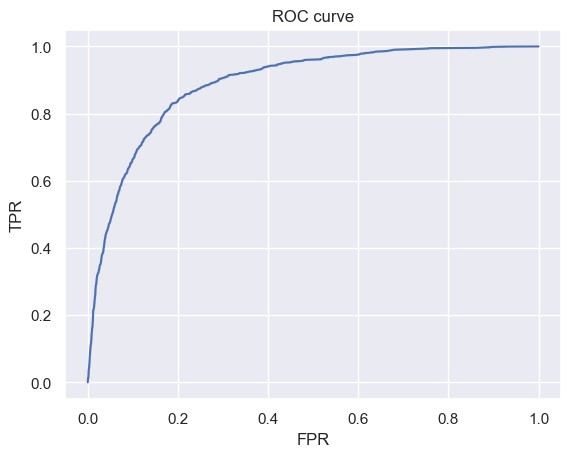

ROC-AUC is the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
ROC-AUC score is: 0.890.


In [49]:
# Q16.4

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_test_proba)
roc_auc = metrics.roc_auc_score(y_test, predicted_test_proba)

#Plotting the ROC curve and computing the ROC-AUC metric:

fig = sns.lineplot(x=fpr, y=tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()
print("ROC-AUC is the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.")
print(f"ROC-AUC score is: {roc_auc:.3f}.")

------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [50]:
random_forest = RandomForestClassifier()
parameters_forest = {"n_estimators": [10, 20, 50, 100, 200], "max_depth": np.linspace(2, 15, 14, dtype="int"), "random_state": [42]}
clf_forest = GridSearchCV(estimator=random_forest, param_grid=parameters_forest, n_jobs=-1)
clf_forest.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': [10, 20, 50, 100, 200],
                         'random_state': [42]})

In [51]:
# Q17.1

best_params = clf_forest.best_params_
opt_depth = int(best_params["max_depth"])
opt_number = int(best_params["n_estimators"])
print(f"The optimal depth and number of trees for the Random forest classifier are: {opt_depth:.3f}, {opt_number:.3f} respectively.")

The optimal depth and number of trees for the Random forest classifier are: 15.000, 200.000 respectively.


In [52]:
# Q17.2

predicted_test = clf_forest.predict(X_test)
predicted_test_proba = clf_forest.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, predicted_test_proba)
print(f"ROC-AUC metric for the Random Forest is: {roc_auc:.3f}.")

ROC-AUC metric for the Random Forest is: 0.925.


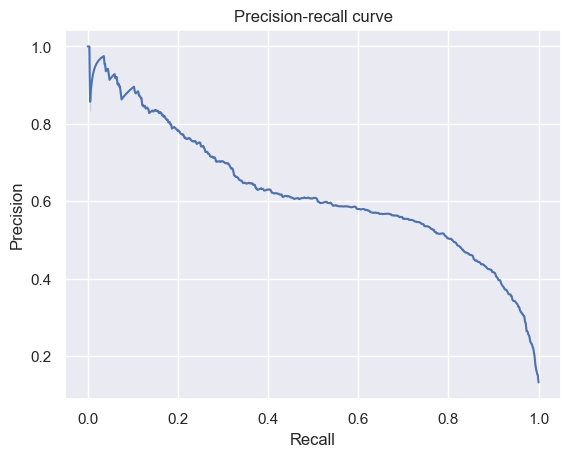

In [53]:
# Q17.3

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, predicted_test_proba)
fig = sns.lineplot(x=recall_rf, y=precision_rf)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve")
plt.show()

In [54]:
max_precision = max(precision_rf[np.where(recall_rf > 0.5)])
print(f" The maximum precision value, where recall > 0.5 is: {max_precision:.3f}.")

 The maximum precision value, where recall > 0.5 is: 0.609.


In [55]:
# Q17.5

y_binary = predicted_test_proba.copy()
y_binary = np.where(predicted_test_proba > 0.3, 1, 0)

print(f"The precision for binarization threshold=0.3 is: {np.round(precision_score(y_test, y_binary), 3)}")

The precision for binarization threshold=0.3 is: 0.559


In [56]:
# Q17.7

rf_coef = pd.DataFrame(clf_forest.best_estimator_.feature_importances_, columns=["coefs"])
rf_names = pd.DataFrame(clf_forest.best_estimator_.feature_names_in_, columns=["names"])
rf_concat = pd.concat([rf_coef, rf_names], axis=1, sort=True)
sorted_df = rf_concat.sort_values("coefs").tail(3).iloc[::-1].values[:, 1]

print(f"Theree most important features for the Logistic regression are: {sorted_df}")

Theree most important features for the Logistic regression are: ['duration' 'poutcome_success' 'age']


-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search. 
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [57]:
rf_coef = pd.DataFrame(clf_forest.best_estimator_.feature_importances_, columns=["coefs"])
rf_names = pd.DataFrame(clf_forest.best_estimator_.feature_names_in_, columns=["names"])
rf_concat = pd.concat([rf_coef, rf_names], axis=1, sort=True)
sorted_df = rf_concat.sort_values("coefs").tail(30).iloc[::-1].values[:, 1]

print(f"Top-30 most important features for the Logistic regression are: {sorted_df}")

drop_list = list(set(X_train.columns.to_list()) - set(sorted_df))
X_train = X_train.drop(columns=drop_list, axis=1)
X_test = X_test.drop(columns=drop_list, axis=1)
X_train.shape

Top-30 most important features for the Logistic regression are: ['duration' 'poutcome_success' 'age' 'balance' 'month' 'day_of_week'
 'pdays' 'campaign' 'housing' 'previous' 'contact_unknown'
 'contact_cellular' 'poutcome_failure' 'marital_married'
 'education_tertiary' 'education_secondary' 'loan' 'marital_single'
 'job_technician' 'job_management' 'job_blue-collar' 'marital_divorced'
 'job_admin' 'education_primary' 'poutcome_other' 'job_retired'
 'job_student' 'education_unknown' 'job_services' 'contact_telephone']


(36168, 30)

In [58]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
clf_rf.fit(X_train, y_train.values.ravel())
predicted_test_rf = clf_rf.predict(X_test)

In [59]:
# Q18.1

predicted_test_proba_rf = clf_rf.predict_proba(X_test)[:, -1]
roc_auc = metrics.roc_auc_score(y_test, predicted_test_proba_rf)
print(f"The ROC-AUC score is: {roc_auc:.3f}.")

The ROC-AUC score is: 0.926.


In [60]:
# 18.2

f1_score_old = f1_score(y_test, predicted_test)
print(f"F1 score was: {f1_score_old:.3f}.")
f1_score_rf = f1_score(y_test, predicted_test_rf)
print(f"F1 score is: {f1_score_rf:.3f}.")

F1 score was: 0.445.
F1 score is: 0.470.


Q 18.3

Yes, classification quality improved a little bit. We can say that because of the f1 score and ROC-AUC metrics.

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

Top 3 features by Anova with f classifier: ['duration', 'contact_unknown', 'poutcome_success']
Top 3 features by Logistic Regression:['poutcome_success' 'job_retired' 'contact_cellular']
Top 3 features by Random Forest: ['duration' 'poutcome_success' 'age']

So they consistent with each other, but only partly. In my opinion, the features 'contact_unknown' and 'contact_cellular' are rather strange, because generally it does not matter which communication type has been used (cellular or telephone), because the marketing campaign is aimed to convincing people to subscribe a term deposit, which has nothing to do with the whether a client has only a cellular, a telephone or both. However, it may be possibly connected with the wealt of each customer, i.e. the wealthiest may have cellulars and vice versa, so on average it becomes possible to estimate some correlation between these features and the client's final answer.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features. 
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [61]:
# Q20.1

# Importing the DataFrame again, because we want to change the way of preprocessing it:
x_df = bank_marketing.data.features

# Filling NaNs with the 'unknown' value:
x_df.loc[:, ["job", "marital", "education", "contact", "poutcome"]] = x_df[["job", "marital", "education", "contact", "poutcome"]].fillna("unknown")

# Replacing all the binary answers with the numerical equivalents:
x_df = x_df.replace({"default": {"yes": 1, "no": 0}, "housing": {"yes": 1, "no": 0}, "loan": {"yes": 1, "no": 0},})

# Process label encoding via the sklearn:
le = LabelEncoder()
x_df["job"] = le.fit_transform(x_df["job"])
x_df["marital"] = le.fit_transform(x_df["marital"])
x_df["education"] = le.fit_transform(x_df["education"])
x_df["contact"] = le.fit_transform(x_df["contact"])
x_df["poutcome"] = le.fit_transform(x_df["poutcome"])
x_df["month"] = le.fit_transform(x_df["month"])

# Change the name of the column to the right one:
x_df = x_df.rename(columns={"day_of_week": "day_of_month"})

# Create 2 new features, that seem meaningful:
x_df["day_of_week"] = x_df["day_of_month"].div(7).astype(int)
x_df["norm_campaign"] = np.where(x_df['campaign'] < 2, 1, 0)

# Let us see, which columns we have now:
x_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_month', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'day_of_week', 'norm_campaign'],
      dtype='object')

Here 2 new features have been generated: 'day_of_week' and 'norm_campaign'. The first one contains the ordinal number of the day of the week and the second one indicates whether the campaign for every particular person was too long or not (generally, the more contacts were made, the less was the success chanse). 

In [62]:
# Q20.3

# Splitting the dataset on the train and test samples:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.18, random_state=42)

# Training XGBoost model with some parameters:
clf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6, max_depth=3, random_state=42).fit(X_train, y_train.values.ravel())

# Computing predict() and predict_proba() on the test data:
predicted_test_xgb = clf_xgb.predict(X_test)
predicted_test_proba_xgb = clf_xgb.predict_proba(X_test)[:, -1]

# Computing the ROC-AUC and F1 score metrics:
roc_auc_xgb = metrics.roc_auc_score(y_test, predicted_test_proba_xgb)
print(f"The ROC-AUC score is: {roc_auc_xgb:.3f}.")

f1_score_rf = f1_score(y_test, predicted_test_xgb)
print(f"F1 score is: {f1_score_rf:.3f}.")

The ROC-AUC score is: 0.927.
F1 score is: 0.537.


In [63]:
x_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_month', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'day_of_week', 'norm_campaign'],
      dtype='object')

In [64]:
clf_xgb.feature_importances_

array([0.07101747, 0.00376307, 0.00687175, 0.00641738, 0.00229649,
       0.02137633, 0.03292788, 0.00344942, 0.03650572, 0.03256402,
       0.17592902, 0.42419456, 0.00283144, 0.07167408, 0.00583927,
       0.0957982 , 0.00405569, 0.00248822])

It is easy to see, that newly generated features are meaningful, so the task 20.1 is done. Moreover, the F1 and ROC-AUC scores have grown up: from 0.470 to 0.537 and from 0.926 to 0.927 respectively. Hence, Gradient Boosting beat Random Forest algotithm.